In [30]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

from LogicalQ.LogicalGeneral import LogicalCircuitGeneral
from LogicalQ.Library.QECCs import five_qubit_code, steane_code, four_qubit_code
from LogicalQ.NoiseModel import construct_noise_model_QuantinuumH1_1
from LogicalQ.Experiments import execute_circuits

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Demonstrating error correction

In [ ]:
code = five_qubit_code
n = code['label'][0]

#Tests errors measuring in Z basis
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])
    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors
        five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0,1])
    five_qubit_circ.measure([0,1], [0,1], meas_basis='Z')
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

['10 01001 11 1000 1000 1000 0 10101 11 1000 1000 1000 0']
['10 00000 10 0001 0001 0001 0 10000 10 0001 0001 0001 0']
['10 10010 10 0011 0011 0011 0 00111 10 0011 0011 0011 0']
['10 11101 11 0110 0110 0110 0 00001 11 0110 0110 0110 0']
['10 00101 10 1100 1100 1100 0 00111 10 1100 1100 1100 0']
['10 00111 00 0000 0000 0000 0 01111 00 0000 0000 0000 0']


In [ ]:
#Tests errors measuring in X basis
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])
    five_qubit_circ.h([0,1])
    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors
        five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0,1])
    five_qubit_circ.measure([0,1], [0,1], meas_basis='X')
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

['10 11000 11 1000 1000 1000 0 11001 11 1000 1000 1000 0']
['10 10110 10 0001 0001 0001 0 11100 10 0001 0001 0001 0']
['10 01010 10 0011 0011 0011 0 10101 10 0011 0011 0011 0']
['10 00000 11 0110 0110 0110 0 00011 11 0110 0110 0110 0']
['10 00111 10 1100 1100 1100 0 00100 10 1100 1100 1100 0']
['10 00101 00 0000 0000 0000 0 00110 00 0000 0000 0000 0']


In [ ]:
#Tests errors measuring in Y basis
outputs = []
for i in range(n+1):
    five_qubit_circ = LogicalCircuitGeneral(2, **code)
    five_qubit_circ.encode(0,1, initial_states=[0,1])
    five_qubit_circ.h([0,1])
    five_qubit_circ.s([0,1])
    if i < n: #Runs the last sim without an error for thorough testing
        five_qubit_circ.add_error(0,i,'X') #Also try testing Z type errors
        five_qubit_circ.add_error(1,i,'X')
    five_qubit_circ.append_qec_cycle([0,1])
    five_qubit_circ.measure([0,1], [0,1], meas_basis='Y')
    simulator = AerSimulator()
    result = execute_circuits(five_qubit_circ, backend=simulator, shots=1, memory=True)[0]
    outputs.append(result.get_memory())

#The leftmost numbers in the output are the logical measurements. Should all be '10'
for o in outputs:
    print(o)

['10 10000 11 1000 1000 1000 0 11010 11 1000 1000 1000 0']
['10 11010 10 0001 0001 0001 0 01011 10 0001 0001 0001 0']
['10 01110 10 0011 0011 0011 0 01101 10 0011 0011 0011 0']
['10 01101 11 0110 0110 0110 0 01001 11 0110 0110 0110 0']
['10 01000 10 1100 1100 1100 0 11001 10 1100 1100 1100 0']
['10 10110 00 0000 0000 0000 0 11101 00 0000 0000 0000 0']


In [3]:
five_qubit_circ.draw('mpl')

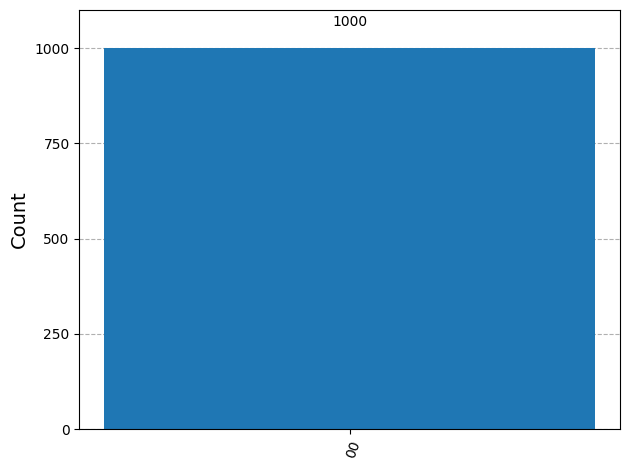

In [ ]:
five_qubit_circ = LogicalCircuitGeneral(2, **five_qubit_code)
five_qubit_circ.encode(0,1)
five_qubit_circ.h(0)
five_qubit_circ.measure([0,1], [0,1])
simulator = AerSimulator()
result = execute_circuits(five_qubit_circ, backend=simulator, shots=1000, memory=True)[0]
plot_histogram(five_qubit_circ.get_logical_output_counts(result.get_memory()))

In [25]:
meas_inds = []
print(five_qubit_circ.LogicalZVector)
print()

for i, x_bit, z_bit in enumerate(zip(five_qubit_circ.LogicalZVector[0][0], five_qubit_circ.LogicalZVector[1][0])):
    print(i, x_bit, z_bit)

[[[0. 0. 0. 0. 0.]]

 [[1. 1. 1. 1. 1.]]]



ValueError: not enough values to unpack (expected 3, got 2)